# Modeling: 

## XGBoost Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: XGBoost Regression](#7_XGBoost_Regression)
    * [7.1 Fitting XGBoost Regression](#7.1_Fitting_XGBoost_Regression)
    * [7.2 XGBoost Regression: Residuals Visualization](#7.2_XGBoost_Regression:_Residuals_Visualization)
    * [7.3 XGBoost Regression Model Evaluation](#7.3_XGBoost_Regression_Model_Evaluation)
    * [7.4 Features Selection](#7.4_Features_Selection)
       * [7.4.1 Features Importance](#7.4.1_Features_Importance)
       * [7.4.2 Keeping high important Features Only](#7.4.2_Keeping_high_important_Features_Only) 
       * [7.4.3 Features Selection Summary](#7.4.3_Features_Selection_Summary)    
    * [7.5 Hyperparameters Tuning: RandomizedSearchCV](#7.5_Hyperparameters_Tuning:_RandomizedSearchCV)
       * [7.5.1 RandomizedSearchCV for all features](#7.5.1_RandomizedSearchCV_for_all_features)
       * [7.5.2 Fitting XGBoost Regression after RandomizedSearchCV (All features)](#7.5.2_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(All_features))
       * [7.5.3 RandomizedSearchCV for high important features](#7.5.3_RandomizedSearchCV_for_high_important_features)
       * [7.5.4 Fitting XGBoost Regression after RandomizedSearchCV (high important features)](#7.5.4_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(high_important_features))
 * [8. XGBoost Regression Tuning Summary](#8_XGBoost_Regression_Tuning_Summary)
 * [9. XGBoost Regression Actual vs Prediction Visualization](#9_XGBoost_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using XGBoost**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [8]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


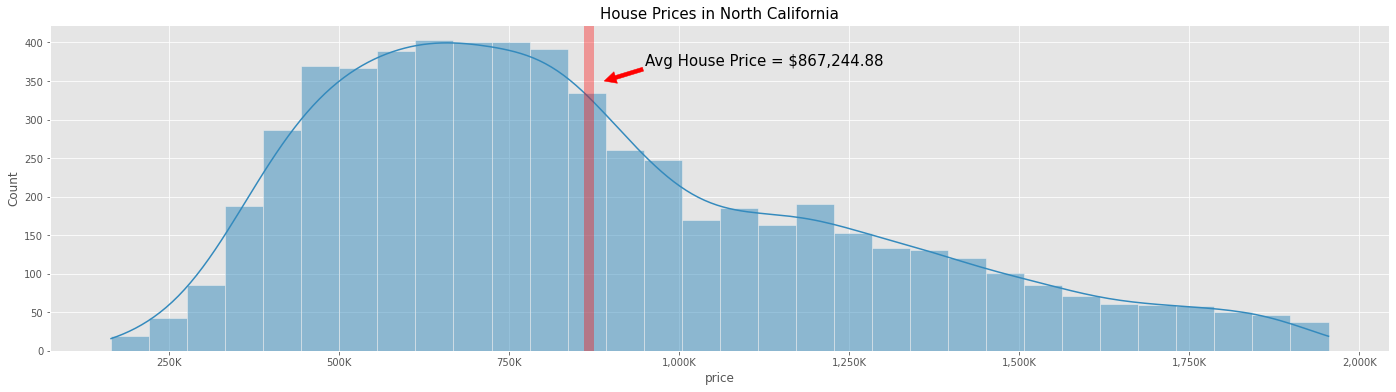

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']



# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: XGBoost Regression<a id='7_XGBoost_Regression'></a>

**XGBoost** an incredibly popular machine learning library for good reason. It was developed originally as a C++ command-line application. After winning a popular machine learning competition, the package started being adopted within the ML community. As a result, bindings, or functions that tapped into the core C++ code, started appearing in a variety of other languages, including Python, R, Scala, and Julia. We will cover the Python API in this course.

**What makes XGBoost so popular?**
  * **Its speed**: Because the core XGBoost algorithm is parallelizable:
    * It can harness all of the processing power of modern multi-core computers.
    * It is parallelizable onto GPU's and across networks of computers, making it feasible to train models on very large datasets on the order of hundreds of millions of training examples.
  * **It's performance**:
    * It consistently outperforms almost all other single-algorithm methods in machine learning competitions and has been shown to achieve state-of-the-art performance on a variety of benchmark machine learning datasets.



### 7.1 Fitting  XGBoost Regression<a id='7.1_Fitting_XGBoost_Regression'></a>


In [17]:
# Import necessary modules
from xgboost import XGBRegressor

# Create a XGBRegressor: xgb
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
xgb = XGBRegressor() 

# Fit the regressor to the training data
xgb.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(xgb.score(X_test, y_test) * 100), '%')

R^2 coefficient : 90.9334 %


In [18]:
# Predict on the test data: y_pred_xgb
y_pred_xgb = xgb.predict(X_test)

### 7.2 XGBoost Regression: Residuals Visualization<a id='7.2_XGBoost_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

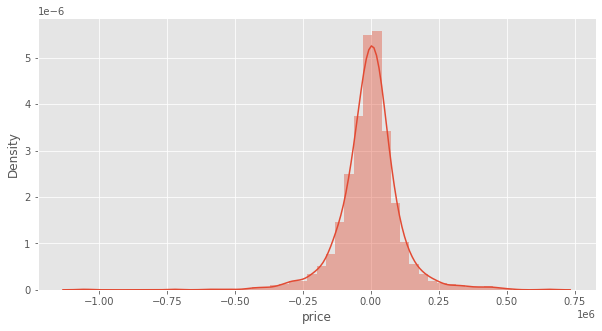

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_xgb)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 XGBoost Regression Model Evaluation<a id='7.3_XGBoost_Regression_Model_Evaluation'></a>

In [21]:
# Import necessary modules
from sklearn import metrics

print("********XGBoost Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb) * 100), '%')
print("-------------------------------------------------")

********XGBoost Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 90.9334 %
-------------------------------------------------
Adjusted R^2 Score: 90.7672 %
-------------------------------------------------
MAE: 74685.8334
-------------------------------------------------
RMSE:113308.0568
-------------------------------------------------
Variance Score:90.9428 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 113,308.0568**, which is slightly higher than 12% of the mean value of the Sales Price i.e.  $867,244.88. 


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


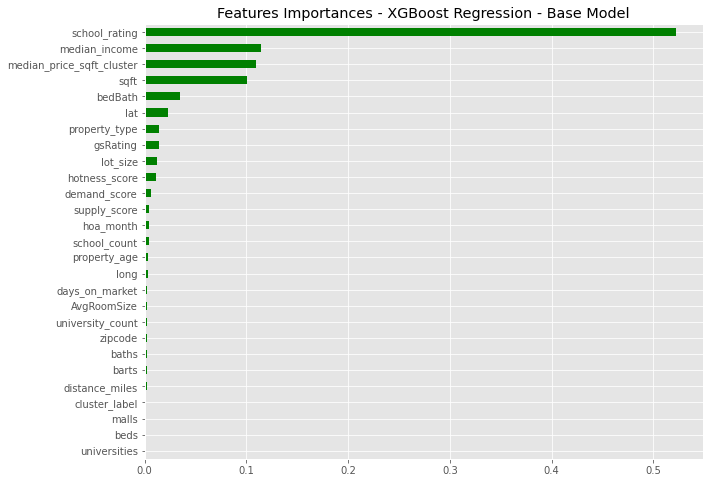

In [22]:
# First, let's create a pd.Series of features importances
importances_xgb = pd.Series(data=xgb.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_xgb.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - XGBoost Regression - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 7.4.2 Keeping high important Features Only<a id='7.4.2_Keeping_high_important_Features_Only'></a> 

In [23]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [25]:
# Create a XGBRegressor: xgb_2
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
xgb_2 = XGBRegressor() 

# Fit the regressor to the training data
xgb_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(xgb_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_xgb_2
y_pred_xgb_2 = xgb_2.predict(X_test)

R^2 coefficient : 91.5418 %


In [26]:
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_2) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_xgb_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_2) * 100), '%')
print("-------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 91.5418 %
-------------------------------------------------
Adjusted R^2 Score: 91.4506 %
-------------------------------------------------
MAE: 72408.9447
-------------------------------------------------
RMSE:109440.3965
-------------------------------------------------
Variance Score:91.5428 %
-------------------------------------------------


#### 7.4.3 Features Selection Summary<a id='7.4.3_Features_Selection_Summary'></a>

As we can see below, when we're keeping the high important features: we're seeing the best Result for XGBoost Regression:

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|90.9334 %|90.7672 %|74685.8334|113308.0568|90.9428 %|
|Baseline (Keeping high important Features)    |91.5418 %|91.4506 %|72408.9447|109440.3965|91.5428 %|


### 7.5 Hyperparameters Tuning: RandomizedSearchCV<a id='7.5_Hyperparameters_Tuning:_RandomizedSearchCV'></a>

#### 7.5.1 RandomizedSearchCV for all features:<a id='7.5.1_RandomizedSearchCV_for_all_features'></a>

In [27]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))




In [29]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = range(100, 1100, 100) # default=100
max_depth = range(6, 22, 2) # default=6
learning_rate = [0.01, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7 , 1] #default 0.3
gamma = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1] # defualt 0
min_child_weight = range(1, 12, 1) #default 1
colsample_bytree = [0, 0.4, 0.8, 1]  #default 1


# Set the parameters by cross-validation
#params = [{'n_estimators': n_est,'max_depth': max_depth,'learning_rate': lr }]

params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'gamma': gamma,
           'min_child_weight': min_child_weight,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a XGBRegressor: xgb_search_1
xgb_search_1 = XGBRegressor() 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: xgb_cv_all
xgb_cv_all = RandomizedSearchCV(estimator = xgb_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv_all.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=500; total time=   4.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=500; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=500; total time=   4.4s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.3, max_depth=18, min_child_weight=2, n_estimators=500; total time=   4.3s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.3, max_depth=18, min_child_weight=2, n_estimators=500; total time=   4.2s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.3, max_depth=18, min_child_weight=2, n_estimators=500; total time=   4.3s
[CV] END colsample_bytree=0.4, gamma=0.7, learning_rate=0.07, max_depth=16, min_child_weight=9, n_estimators=400; total time=   1.8s
[CV] END colsam

[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.7, max_depth=10, min_child_weight=6, n_estimators=300; total time=   0.5s
[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.7, max_depth=10, min_child_weight=6, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.7, max_depth=10, min_child_weight=6, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.5, max_depth=6, min_child_weight=9, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.5, max_depth=6, min_child_weight=9, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.5, max_depth=6, min_child_weight=9, n_estimators=200; total time=   0.6s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=100; total time=   1.5s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_w

[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=11, n_estimators=500; total time=   3.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=11, n_estimators=500; total time=   3.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=11, n_estimators=500; total time=   3.1s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.7, max_depth=6, min_child_weight=11, n_estimators=200; total time=   0.9s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.7, max_depth=6, min_child_weight=11, n_estimators=200; total time=   1.1s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.7, max_depth=6, min_child_weight=11, n_estimators=200; total time=   1.2s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=10, min_child_weight=5, n_estimators=400; total time=   3.8s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=10, min_child_we

[CV] END colsample_bytree=0, gamma=0.05, learning_rate=1, max_depth=18, min_child_weight=3, n_estimators=800; total time=   3.2s
[CV] END colsample_bytree=0, gamma=0.05, learning_rate=1, max_depth=18, min_child_weight=3, n_estimators=800; total time=   2.8s
[CV] END colsample_bytree=0, gamma=0.05, learning_rate=1, max_depth=18, min_child_weight=3, n_estimators=800; total time=   3.4s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=18, min_child_weight=10, n_estimators=900; total time=   8.3s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=18, min_child_weight=10, n_estimators=900; total time=  10.6s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.07, max_depth=18, min_child_weight=10, n_estimators=900; total time=  16.4s
[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.07, max_depth=12, min_child_weight=10, n_estimators=900; total time=   3.0s
[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.07, max_depth=12, 

[CV] END colsample_bytree=0, gamma=0.7, learning_rate=1, max_depth=12, min_child_weight=8, n_estimators=300; total time=   0.9s
[CV] END colsample_bytree=0, gamma=0.7, learning_rate=1, max_depth=12, min_child_weight=8, n_estimators=300; total time=   1.0s
[CV] END colsample_bytree=0, gamma=0.7, learning_rate=1, max_depth=12, min_child_weight=8, n_estimators=300; total time=   1.1s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=11, n_estimators=700; total time=   8.4s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=11, n_estimators=700; total time=   7.7s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=11, n_estimators=700; total time=   8.6s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, n_estimators=800; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=8, 

[CV] END colsample_bytree=0, gamma=1, learning_rate=1, max_depth=18, min_child_weight=10, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0, gamma=1, learning_rate=1, max_depth=18, min_child_weight=10, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0, gamma=1, learning_rate=1, max_depth=18, min_child_weight=10, n_estimators=100; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.1, max_depth=18, min_child_weight=8, n_estimators=1000; total time=  17.5s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.1, max_depth=18, min_child_weight=8, n_estimators=1000; total time=  17.5s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.1, max_depth=18, min_child_weight=8, n_estimators=1000; total time=  18.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=300; total time=   6.8s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weig

[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.01, max_depth=14, min_child_weight=6, n_estimators=300; total time=   2.1s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.01, max_depth=14, min_child_weight=6, n_estimators=300; total time=   2.1s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.01, max_depth=14, min_child_weight=6, n_estimators=300; total time=   2.8s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=16, min_child_weight=11, n_estimators=200; total time=   1.8s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=16, min_child_weight=11, n_estimators=200; total time=   2.0s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=16, min_child_weight=11, n_estimators=200; total time=   1.8s
[CV] END colsample_bytree=0.4, gamma=0.7, learning_rate=0.01, max_depth=16, min_child_weight=9, n_estimators=200; total time=   1.1s
[CV] END colsample_bytree=0.4, gamma=0.7, learning_rate=0.01, max_

[CV] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.3, max_depth=10, min_child_weight=9, n_estimators=400; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.3, max_depth=10, min_child_weight=9, n_estimators=400; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.3, max_depth=10, min_child_weight=9, n_estimators=400; total time=   4.4s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=10, n_estimators=500; total time=   4.9s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=10, n_estimators=500; total time=   4.9s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=10, n_estimators=500; total time=   4.7s
[CV] END colsample_bytree=1, gamma=0.05, learning_rate=0.07, max_depth=10, min_child_weight=11, n_estimators=500; total time=   5.9s
[CV] END colsample_bytree=1, gamma=0.05, learning_rate=0.07, max_d

[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=8, min_child_weight=11, n_estimators=600; total time=   3.9s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=8, min_child_weight=11, n_estimators=600; total time=   3.9s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=8, min_child_weight=11, n_estimators=600; total time=   4.7s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.01, max_depth=10, min_child_weight=9, n_estimators=600; total time=   3.5s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.01, max_depth=10, min_child_weight=9, n_estimators=600; total time=   3.4s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.01, max_depth=10, min_child_weight=9, n_estimators=600; total time=   3.3s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=1, max_depth=16, min_child_weight=4, n_estimators=700; total time=   8.7s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=1, max_depth=16, 

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1000; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1000; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1000; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=14, min_child_weight=6, n_estimators=300; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=14, min_child_weight=6, n_estimators=300; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=14, min_child_weight=6, n_estimators=300; total time=   2.8s
[CV] END colsample_bytree=0, gamma=0.01, learning_rate=0.1, max_depth=8, min_child_weight=8, n_estimators=900; total time=   1.6s
[CV] END colsample_bytree=0, gamma=0.01, learning_rate=0.1, max_depth=8, min_chil

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=200, n_jobs=1,
                   par

In [30]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv_all.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error is {}".format(xgb_cv_all.best_score_))

Tuned XGBoost Regression Parameters: {'n_estimators': 900, 'min_child_weight': 11, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.4}
Tuned XGBoost - Best neg_mean_squared_error is -11852892378.454847


In [84]:
cv_results = pd.DataFrame(xgb_cv_all.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.163326,0.279301,0.011162,5.615258e-04,500,6,20,0.3,1,0.8,...,-1.541829e+10,-1.414301e+10,-1.461661e+10,5.699817e+08,85,-1.960374e-01,-3.469325e-01,-1.355744e-01,-2.261814e-01,8.888025e-02
1,4.343806,0.035328,0.016602,5.906911e-03,500,2,18,0.3,0.01,0.4,...,-1.541727e+10,-1.540941e+10,-1.528175e+10,1.861171e+08,89,-4.434163e-03,-4.802436e-03,-4.085634e-03,-4.440744e-03,2.926702e-04
2,1.822731,0.087009,0.007933,8.485379e-07,400,9,16,0.07,0.7,0.4,...,-1.250146e+10,-1.252669e+10,-1.235018e+10,2.320113e+08,19,-4.406189e+07,-7.195586e+07,-2.617774e+07,-4.739849e+07,1.883718e+07
3,4.199826,0.192421,0.010805,1.737015e-04,1000,11,10,0.05,1,1,...,-1.262038e+10,-1.320734e+10,-1.280441e+10,2.852694e+08,39,-6.258154e+07,-1.079340e+08,-3.061160e+07,-6.704238e+07,3.172395e+07
4,3.015746,0.135246,0.014757,4.097084e-03,900,9,12,0.07,0.3,0.4,...,-1.246144e+10,-1.261335e+10,-1.236486e+10,2.517610e+08,20,-7.564322e+06,-9.435508e+06,-4.792925e+06,-7.264252e+06,1.907166e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.291813,0.363230,0.006636,2.343586e-03,700,4,12,1,0.1,0.4,...,-3.773045e+10,-3.571363e+10,-3.602817e+10,1.280959e+09,187,-7.486898e-03,-7.251733e-03,-7.144510e-03,-7.294380e-03,1.429953e-04
196,4.937975,0.287587,0.009292,4.486723e-04,300,2,16,0.1,0,0.8,...,-1.368473e+10,-1.357441e+10,-1.343409e+10,2.800962e+08,68,-6.190043e+02,-6.059529e+03,-8.273930e+03,-4.984154e+03,3.216291e+03
197,3.569808,0.163194,0.011892,3.582416e-03,300,9,14,0.3,1,1,...,-1.415695e+10,-1.426438e+10,-1.423943e+10,5.981262e+07,77,-2.979724e+04,-1.174349e+05,-2.483491e+05,-1.318604e+05,8.980460e+04
198,15.694689,1.999258,0.032633,1.365807e-02,800,2,18,0.1,0.01,1,...,-1.349842e+10,-1.403750e+10,-1.346536e+10,4.812205e+08,69,-1.081153e-01,-1.617177e-01,-1.110972e+01,-3.793183e+00,5.173617e+00


#### 7.5.2 Fitting XGBoost Regression after RandomizedSearchCV (All features)<a id='7.5.2_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(All_features)'></a>

In [32]:
#(Best RandomizedSearchCV)

n_estimators = 900
learning_rate = 0.01
max_depth = 10
min_child_weight = 11
gamma = 0.3
colsample_bytree = 0.4




# Create a XGBRegressor: xgb_tuned_cv_1
xgb_tuned_cv_1 = XGBRegressor(n_estimators = n_estimators,
                              learning_rate = learning_rate,
                              max_depth=max_depth,
                              min_child_weight=min_child_weight,
                              gamma=gamma, 
                              colsample_bytree=colsample_bytree)

# Fit the regressor to the training data
xgb_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_final : {:.4f}".format(xgb_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_xgb_cv_1
y_pred_xgb_cv_1 = xgb_tuned_cv_1.predict(X_test)


R^2 coefficient Tuned_final : 92.5617 %


In [33]:
from sklearn import metrics
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_cv_1) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_xgb_cv_1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_cv_1)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_cv_1))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_cv_1) * 100), '%')
print("-------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.5617 %
-------------------------------------------------
Adjusted R^2 Score: 92.4253 %
-------------------------------------------------
MAE: 66304.8201
-------------------------------------------------
RMSE:102630.7106
-------------------------------------------------
Variance Score:92.5737 %
-------------------------------------------------


#### 7.5.3 RandomizedSearchCV for high important features<a id='7.5.3_RandomizedSearchCV_for_high_important_features'></a> 

In [34]:
# Let's define/select our features:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [35]:
n_estimators = range(100, 1100, 100) # default=100
max_depth = range(6, 22, 2) # default=6
learning_rate = [0.01, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7 , 1] #default 0.3
gamma = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1] # defualt 0
min_child_weight = range(1, 12, 1) #default 1
colsample_bytree = [0, 0.4, 0.8, 1]  #default 1


# Set the parameters by cross-validation
#params = [{'n_estimators': n_est,'max_depth': max_depth,'learning_rate': lr }]

params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'gamma': gamma,
           'min_child_weight': min_child_weight,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a XGBRegressor: xgb_search_2
xgb_search_2 = XGBRegressor() 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: xgb_cv_2
xgb_cv_2 = RandomizedSearchCV(estimator = xgb_search_2, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv_2.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.7, max_depth=6, min_child_weight=10, n_estimators=700; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.7, max_depth=6, min_child_weight=10, n_estimators=700; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.7, max_depth=6, min_child_weight=10, n_estimators=700; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.7, max_depth=6, min_child_weight=4, n_estimators=500; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.7, max_depth=6, min_child_weight=4, n_estimators=500; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.7, max_depth=6, min_child_weight=4, n_estimators=500; total time=   0.9s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=1, max_depth=20, min_child_weight=1, n_estimators=700; total time=  11.9s
[CV] END colsa

[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=500; total time=   5.3s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=500; total time=   5.4s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=500; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=300; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=300; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=2, n_estimators=300; total time=   0.8s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=8, min_child_weight=8, n_estimators=400; total time=   1.6s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=0.3, max_depth=8, min_child_w

[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=300; total time=   1.3s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=300; total time=   1.5s
[CV] END colsample_bytree=0.4, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=300; total time=   1.5s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.7, max_depth=14, min_child_weight=5, n_estimators=500; total time=   5.4s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.7, max_depth=14, min_child_weight=5, n_estimators=500; total time=   5.4s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.7, max_depth=14, min_child_weight=5, n_estimators=500; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=9, n_estimators=500; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=12, min_ch

[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=1, max_depth=16, min_child_weight=3, n_estimators=600; total time=   6.5s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=1, max_depth=16, min_child_weight=3, n_estimators=600; total time=   7.4s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=1, max_depth=16, min_child_weight=3, n_estimators=600; total time=   7.2s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=18, min_child_weight=1, n_estimators=1000; total time=  18.0s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=18, min_child_weight=1, n_estimators=1000; total time=  18.4s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.7, max_depth=18, min_child_weight=1, n_estimators=1000; total time=  18.2s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.3, max_depth=10, min_child_weight=1, n_estimators=500; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.3, max_depth=10,

[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.05, max_depth=12, min_child_weight=9, n_estimators=700; total time=   2.3s
[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.05, max_depth=12, min_child_weight=9, n_estimators=700; total time=   2.3s
[CV] END colsample_bytree=0, gamma=0.07, learning_rate=0.05, max_depth=12, min_child_weight=9, n_estimators=700; total time=   1.6s
[CV] END colsample_bytree=0, gamma=0, learning_rate=0.07, max_depth=10, min_child_weight=10, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0, gamma=0, learning_rate=0.07, max_depth=10, min_child_weight=10, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0, gamma=0, learning_rate=0.07, max_depth=10, min_child_weight=10, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0, gamma=0, learning_rate=0.05, max_depth=20, min_child_weight=8, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=0, gamma=0, learning_rate=0.05, max_depth=20, min_child_wei

[CV] END colsample_bytree=0.8, gamma=0.7, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.7, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0.7, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000; total time=   2.5s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=900; total time=   2.9s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=900; total time=   2.8s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=6, n_estimators=900; total time=   2.9s
[CV] END colsample_bytree=0.4, gamma=0.7, learning_rate=0.01, max_depth=20, min_child_weight=7, n_estimators=1000; total time=   6.6s
[CV] END colsample_bytree=0.4, gamma=0.7, learning_rate=0.01, max_de

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.07, max_depth=16, min_child_weight=11, n_estimators=1000; total time=   5.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.07, max_depth=16, min_child_weight=11, n_estimators=1000; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.07, max_depth=16, min_child_weight=11, n_estimators=1000; total time=   6.4s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=18, min_child_weight=7, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=18, min_child_weight=7, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=18, min_child_weight=7, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.3, max_depth=20, min_child_weight=11, n_estimators=300; total time=   2.3s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.3, max_depth=20, min_

[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=1, max_depth=18, min_child_weight=9, n_estimators=900; total time=   5.7s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=1, max_depth=18, min_child_weight=9, n_estimators=900; total time=   5.5s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=1, max_depth=18, min_child_weight=9, n_estimators=900; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.7, max_depth=10, min_child_weight=10, n_estimators=800; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.7, max_depth=10, min_child_weight=10, n_estimators=800; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.7, max_depth=10, min_child_weight=10, n_estimators=800; total time=   3.1s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=1, max_depth=20, min_child_weight=1, n_estimators=500; total time=   8.0s
[CV] END colsample_bytree=1, gamma=0.01, learning_rate=1, max_depth=20, min_child_wei

[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=0.05, max_depth=18, min_child_weight=3, n_estimators=500; total time=   3.7s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=0.05, max_depth=18, min_child_weight=3, n_estimators=500; total time=   3.9s
[CV] END colsample_bytree=0.4, gamma=0.07, learning_rate=0.05, max_depth=18, min_child_weight=3, n_estimators=500; total time=   3.8s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.07, max_depth=6, min_child_weight=11, n_estimators=900; total time=   1.6s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.07, max_depth=6, min_child_weight=11, n_estimators=900; total time=   1.6s
[CV] END colsample_bytree=0.4, gamma=0.01, learning_rate=0.07, max_depth=6, min_child_weight=11, n_estimators=900; total time=   1.6s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.07, max_depth=16, min_child_weight=9, n_estimators=1000; total time=   6.8s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.07, max_dept

[CV] END colsample_bytree=0, gamma=0.1, learning_rate=0.7, max_depth=8, min_child_weight=3, n_estimators=400; total time=   0.4s
[CV] END colsample_bytree=0, gamma=0.1, learning_rate=0.7, max_depth=8, min_child_weight=3, n_estimators=400; total time=   0.5s
[CV] END colsample_bytree=0, gamma=0.1, learning_rate=0.7, max_depth=8, min_child_weight=3, n_estimators=400; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.07, max_depth=20, min_child_weight=8, n_estimators=1000; total time=   8.6s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.07, max_depth=20, min_child_weight=8, n_estimators=1000; total time=   7.7s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.07, max_depth=20, min_child_weight=8, n_estimators=1000; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=8, n_estimators=800; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=8, n_

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=200, n_jobs=1,
                   par

In [36]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv_2.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error is {}".format(xgb_cv_2.best_score_))

Tuned XGBoost Regression Parameters: {'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.01, 'colsample_bytree': 0.4}
Tuned XGBoost - Best neg_mean_squared_error is -11785803681.704994


In [77]:
cv_results = pd.DataFrame(xgb_cv_2.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,200.0,3.280000e+00,3.050000e+00,2.100000e-01,1.110000e+00,2.180000e+00,4.530000e+00,1.829000e+01
std_fit_time,200.0,1.600000e-01,2.000000e-01,0.000000e+00,3.000000e-02,9.000000e-02,1.800000e-01,1.370000e+00
mean_score_time,200.0,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,5.000000e-02
std_score_time,200.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-02
split0_test_score,200.0,-2.022452e+10,1.366045e+10,-1.310630e+11,-2.301060e+10,-1.699664e+10,-1.270185e+10,-1.155023e+10
split1_test_score,200.0,-2.086616e+10,1.485909e+10,-1.442469e+11,-2.352597e+10,-1.796318e+10,-1.341959e+10,-1.166927e+10
split2_test_score,200.0,-2.073088e+10,1.453809e+10,-1.417998e+11,-2.344679e+10,-1.793946e+10,-1.328524e+10,-1.197845e+10
mean_test_score,200.0,-2.060718e+10,1.433015e+10,-1.389655e+11,-2.368090e+10,-1.734641e+10,-1.315381e+10,-1.178580e+10
std_test_score,200.0,6.417069e+08,7.493774e+08,1.335995e+07,2.634247e+08,4.226847e+08,6.706966e+08,5.809005e+09
rank_test_score,200.0,1.005000e+02,5.788000e+01,1.000000e+00,5.075000e+01,1.005000e+02,1.502500e+02,2.000000e+02


#### 7.5.4 Fitting XGBoost Regression after RandomizedSearchCV (high important features)<a id='7.5.4_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(high_important_features)'></a>

In [76]:
#(Best RandomizedSearchCV)

n_estimators = 600
learning_rate = 0.01
max_depth = 16
min_child_weight = 12
gamma = 0.3
colsample_bytree = 0.6

# Create a XGBRegressor: xgb_tuned_cv_2
xgb_tuned_cv_2 = XGBRegressor(n_estimators = n_estimators,
                              max_depth = max_depth,
                              learning_rate = learning_rate,
                              gamma = gamma,
                              min_child_weight = min_child_weight,
                              colsample_bytree = colsample_bytree)

# Fit the regressor to the training data
xgb_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_final : {:.4f}".format(xgb_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_xgb_cv_2
y_pred_xgb_cv_2 = xgb_tuned_cv_2.predict(X_test)

R^2 coefficient Tuned_final : 92.5777 %


In [78]:
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_cv_2) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_xgb_cv_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_cv_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_cv_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_cv_2) * 100), '%')
print("-------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.5777 %
-------------------------------------------------
Adjusted R^2 Score: 92.4977 %
-------------------------------------------------
MAE: 67043.7283
-------------------------------------------------
RMSE:102520.0032
-------------------------------------------------
Variance Score:92.5786 %
-------------------------------------------------


## 8. XGBoost Regression Tuning Summary<a id='8_XGBoost_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our XGBoost Regression Model by:
 * keeping only the high important features: and
 * Hyperparameters Tuning using RandomizedSearchCV to determine best:
   * {'n_estimators': 900, 'min_child_weight': 11, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.4} when considering all features.
   * {'n_estimators': 600, 'min_child_weight': 12, 'max_depth': 16, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6} when considering only the high important features.
 * Variance Score has improved from 90.9428 % (XGBoost - baseline) to 92.5786 %.
 
|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|90.9334 %|90.7672 %|74685.8334|113308.0568|90.9428 %|
|Baseline (Keeping high important Features)    |91.5418 %|91.4506 %|72408.9447|109440.3965|91.5428 %|
|All Features + RandomizedSearchCV {'n_estimators': 900, 'min_child_weight': 11, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.4}|92.5617 %|92.3162 %|66304.8201|102630.7106|92.5737 %|
|High Important Features + RandomizedSearchCV {'n_estimators': 600, 'min_child_weight': 12, 'max_depth': 16, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}|92.5777 %|92.4977 %|67043.7283|102520.0032|92.5786 %|

 

## 9. XGBoost Regression Actual vs Prediction Visualization<a id='9_XGBoost_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

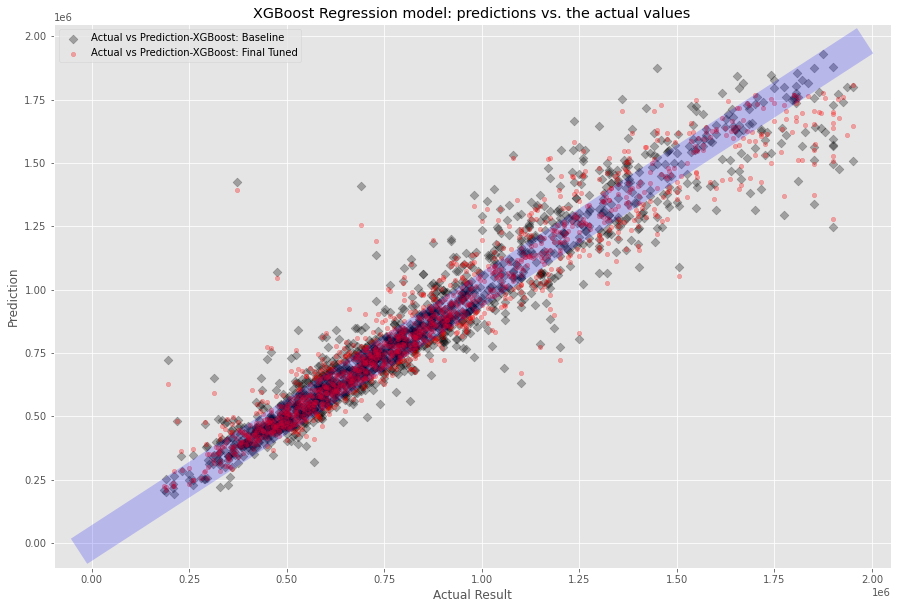

In [81]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_xgb, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-XGBoost: Baseline')
plt.scatter(y_test,y_pred_xgb_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-XGBoost: Final Tuned')
plt.title('XGBoost Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [83]:
final_xgb = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_xgb.round(3), 'SalePrice_Predicted_Tuned': y_pred_xgb_cv_2.round(3)})
final_xgb.head(30).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
437,1767539,1.578709e+06,1.541972e+06
253,1600000,1.648956e+06,1.635938e+06
2625,1566000,1.692253e+06,1.568974e+06
2170,1485000,1.448078e+06,1.451541e+06
1913,1463000,1.248222e+06,1.271258e+06
3237,1370000,1.283085e+06,1.364897e+06
1804,1320000,1.067407e+06,1.028034e+06
4358,1170000,1.022966e+06,1.063468e+06
1343,1005000,8.663988e+05,9.094098e+05
406,990000,1.073608e+06,1.075199e+06


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 8th Model: XGBoost, let's see if we can further improve our prediction using below algorithm:

 * Light GBM Regression.
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))